# Initialization

In [1]:
import matplotlib.pyplot as plt
import portfolio.portfolio as pf
import imp
imp.reload(pf)

import warnings
warnings.filterwarnings("ignore")

In [2]:
portfolio_json_path = open(r"_json_path.txt","r").read().strip()
start_date = "2019-01-01"
end_date = "2022-08-22"
n_dates = 500

In [3]:
my_port = pf.Portfolio(portfolio_json_path)

In [4]:
# custom color cycle
from cycler import cycler
cols = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
lss = ['-', '--', ':', '-.']
lscyc = [s for s in lss for i in range(len(cols))]
colcyc = [c for i in range(len(lss)) for c in cols]
default_cycler = (cycler(color=colcyc) + cycler(linestyle=lscyc))
plt.rc('axes', prop_cycle=default_cycler)

# Plotting portfolio performance

Note: for simplicity, performance does not consider the individual transactions in the transaction statements. Costs of assets, e.g. for funds, are also not considered. Instead, the performance is estimated by using the current amount of money in each asset and considering the historic performance of each asset. This gives a rough estimation of the historic performance of the current portfolio. However, this is not valid in case of e.g. frequent movements and redistributions.

## Total performance

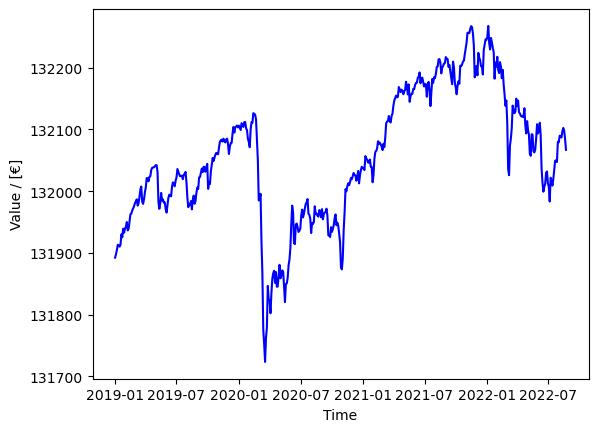

In [5]:
cp_d, cp_p = my_port.total_performance(start_date, end_date, n_dates, disp=False) 
plt.plot(cp_d, cp_p)
plt.xlabel("Time")
plt.ylabel("Value / [€]")
plt.show()

## Individual asset performance

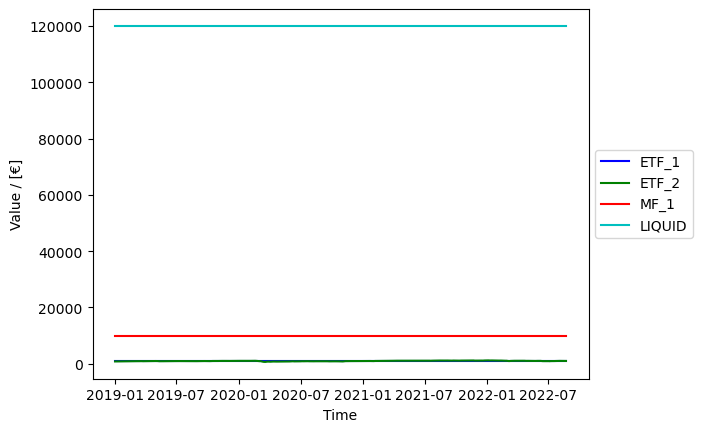

In [6]:
# absolute performance based on value in portfolio
perf = my_port.collect_performance(start_date, end_date, n_dates, disp=False) 
for nm, (cp_d, cp_p) in perf.items():
    plt.plot(cp_d, cp_p, label=nm)
plt.xlabel("Time")
plt.ylabel("Value / [€]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

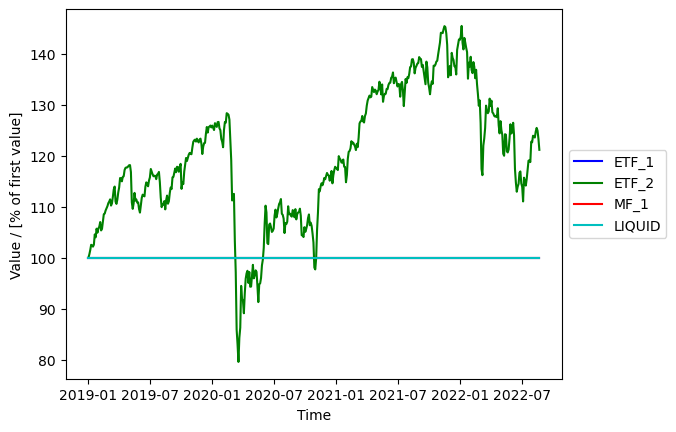

In [7]:
# relative performance 
perf = my_port.collect_performance(start_date, end_date, n_dates, disp=False) 
for nm, (cp_d, cp_p) in perf.items():
    cp_p = cp_p/cp_p[0]*100
    plt.plot(cp_d, cp_p, label=nm)
    
plt.xlabel("Time")
plt.ylabel("Value / [% of first value]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()